In [2]:
import warnings

warnings.simplefilter("ignore")

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ssb



In [3]:
accidentes = pd.read_csv("subMuestra-Accidentalidad.csv",encoding='utf-8')

In [4]:
accidentes.head(5)

,BARRIO,CBML,CLASE,COMUNA,DIA,DIA_NOMBRE,DIRECCION,DIRECCION_ENC,DISENO,FECHA,GRAVEDAD,HORA,MES,MES_NOMBRE,OBJECTID,PERIODO,RADICADO,TIPO_GEOCOD,X,Y
0,Campo Amor,1507,Choque,Guayabal,20,JUEVES,CR 50 FF CL 9 AA,CR 050 FF 009 AA 000 00000,Tramo de via,2018-09-20T00:00:00.000Z,HERIDO,02:10:00 p. m.,9,SEPTIEMBRE,673380,2018,1642888.0,Malla vial aproximada: CR 50-10,-75.578357,6.213719
1,Villa Flora,0715,Atropello,Robledo,21,MIÉRCOLES,CL 76 AE CR 83,CL 076 AE 083 000 00000,Tramo de via,2018-03-21T00:00:00.000Z,HERIDO,08:30 PM,3,MARZO,557526,2018,1620950.0,Malla vial,-75.592022,6.279157
2,Robledo,0717,Choque,Robledo,30,JUEVES,CR 85 CL 65,CR 085 065 000 00000,Interseccion,2018-08-30T00:00:00.000Z,SOLO DAÑOS,09:20:00 p. m.,8,AGOSTO,674912,2018,1640270.0,Malla vial,-75.595882,6.275555
3,La Candelaria,1019,Choque,La Candelaria,10,LUNES,CL 49 A CR 49,CL 049 A 049 000 00000,Interseccion,2018-09-10T00:00:00.000Z,SOLO DAÑOS,08:50:00 a. m.,9,SEPTIEMBRE,674286,2018,1641770.0,Malla vial aproximada: CL 49-49,-75.567284,6.248271
4,Manila,1419,Choque,El Poblado,12,VIERNES,CR 48 DD CL 9,CR 048 DD 009 000 00000,Tramo de via,2018-10-12T00:00:00.000Z,SOLO DAÑOS,06:18:00 p. m.,10,OCTUBRE,681701,2018,1645768.0,Malla vial aproximada: CR 48-10,-75.576195,6.213677


In [5]:
accidentes.shape

(35619, 20)

Cambiamos el nombre de la columna DIA_NOMBRE por DIA_NUMERO y factorizamos

In [6]:
accidentes = accidentes.rename(columns={'DIA_NOMBRE':'DIA_SEMANA'})


accidentes['DIA_SEMANA'] = pd.factorize(accidentes['DIA_SEMANA'])[0]




In [7]:
accidentes['DIA_SEMANA'].unique()

array([0, 1, 2, 3, 4, 5, 6], dtype=int64)


Factorizamos los dias de la comuna

In [8]:
accidentes['NUM_COMUNA'] = accidentes['COMUNA']

accidentes['NUM_COMUNA'] = pd.factorize(accidentes['NUM_COMUNA'])[0]

In [9]:
accidentes['NUM_GRAVEDAD'] = accidentes['GRAVEDAD']

print(f'Faztorizamos la columna GRAVEDAD donde\n')
print(f'0 = HERIDO\n1 = SOLO DAÑOS\n2 = MUERTO')



Faztorizamos la columna GRAVEDAD donde

0 = HERIDO
1 = SOLO DAÑOS
2 = MUERTO


In [10]:
accidentes['NUM_GRAVEDAD'].value_counts()

HERIDO        18773
SOLO DAÑOS    16622
MUERTO          224
Name: NUM_GRAVEDAD, dtype: int64

In [11]:
accidentes['NUM_GRAVEDAD'] = pd.factorize(accidentes['NUM_GRAVEDAD'])[0]

In [12]:
accidentes['NUM_DISENO'] = accidentes['DISENO']

print(f'Cambiamos los valores de la columna DISENO donde\n')
print(f'0 = Tramo de via\n1 = Interseccion\n2 = Lote o Predio\n3 = Glorieta\n4 = Paso Inferior\n5 = Paso Elevado\n6 = Puente\n7 = Ciclo Ruta\n8 = Paso a Nivel\n9 = Via peatonal\n10 = Tunel\n11 = Pontón')



Cambiamos los valores de la columna DISENO donde

0 = Tramo de via
1 = Interseccion
2 = Lote o Predio
3 = Glorieta
4 = Paso Inferior
5 = Paso Elevado
6 = Puente
7 = Ciclo Ruta
8 = Paso a Nivel
9 = Via peatonal
10 = Tunel
11 = Pontón


In [13]:
accidentes['NUM_DISENO'] = pd.factorize(accidentes['NUM_DISENO'])[0]

In [14]:
accidentes['NUM_CLASE'] = accidentes['CLASE']


print(f'Cambiamos los valores de la columna CLASE donde\n')
print(f'0 = Choque\n1 = Atropello\n2 = Volcamiento\n3 = Caida Ocupante\n4 = Incendio\n5 = Otro\n')


Cambiamos los valores de la columna CLASE donde

0 = Choque
1 = Atropello
2 = Volcamiento
3 = Caida Ocupante
4 = Incendio
5 = Otro



In [15]:
accidentes['NUM_CLASE'] = pd.factorize(accidentes['NUM_CLASE'])[0]

In [16]:
accidentes['NUM_BARRIO'] = accidentes['BARRIO']


accidentes['NUM_BARRIO'] = pd.factorize(accidentes['NUM_BARRIO'])[0]

In [17]:
accidentes.columns

Index(['BARRIO', 'CBML', 'CLASE', 'COMUNA', 'DIA', 'DIA_SEMANA', 'DIRECCION',
       'DIRECCION_ENC', 'DISENO', 'FECHA', 'GRAVEDAD', 'HORA', 'MES',
       'MES_NOMBRE', 'OBJECTID', 'PERIODO', 'RADICADO', 'TIPO_GEOCOD', 'X',
       'Y', 'NUM_COMUNA', 'NUM_GRAVEDAD', 'NUM_DISENO', 'NUM_CLASE',
       'NUM_BARRIO'],
      dtype='object')

In [18]:
accidentes.head(10)

,BARRIO,CBML,CLASE,COMUNA,DIA,DIA_SEMANA,DIRECCION,DIRECCION_ENC,DISENO,FECHA,...,PERIODO,RADICADO,TIPO_GEOCOD,X,Y,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
0,Campo Amor,1507,Choque,Guayabal,20,0,CR 50 FF CL 9 AA,CR 050 FF 009 AA 000 00000,Tramo de via,2018-09-20T00:00:00.000Z,...,2018,1642888.0,Malla vial aproximada: CR 50-10,-75.578357,6.213719,0,0,0,0,0
1,Villa Flora,0715,Atropello,Robledo,21,1,CL 76 AE CR 83,CL 076 AE 083 000 00000,Tramo de via,2018-03-21T00:00:00.000Z,...,2018,1620950.0,Malla vial,-75.592022,6.279157,1,0,0,1,1
2,Robledo,0717,Choque,Robledo,30,0,CR 85 CL 65,CR 085 065 000 00000,Interseccion,2018-08-30T00:00:00.000Z,...,2018,1640270.0,Malla vial,-75.595882,6.275555,1,1,1,0,2
3,La Candelaria,1019,Choque,La Candelaria,10,2,CL 49 A CR 49,CL 049 A 049 000 00000,Interseccion,2018-09-10T00:00:00.000Z,...,2018,1641770.0,Malla vial aproximada: CL 49-49,-75.567284,6.248271,2,1,1,0,3
4,Manila,1419,Choque,El Poblado,12,3,CR 48 DD CL 9,CR 048 DD 009 000 00000,Tramo de via,2018-10-12T00:00:00.000Z,...,2018,1645768.0,Malla vial aproximada: CR 48-10,-75.576195,6.213677,3,1,0,0,4
5,La Floresta,1205,Choque,La América,16,4,CR 87 CL 47 BB,CR 087 047 BB 000 00000,Interseccion,2018-12-16T00:00:00.000Z,...,2018,1653788.0,Malla vial aproximada: CR 87-47A,-75.603532,6.257358,4,0,1,0,5
6,Campo Amor,1507,Atropello,Guayabal,26,3,CR 50 F CL 9 A,CR 050 F 009 A 000 00000,Tramo de via,2018-10-26T00:00:00.000Z,...,2018,1647340.0,Malla vial aproximada: CR 50-10,-75.578357,6.213719,0,0,0,1,0
7,Las Granjas,0302,Choque,Manrique,5,1,CL 85 D CR 32,CL 085 D 032 000 00000,Tramo de via,2018-09-05T00:00:00.000Z,...,2018,1641184.0,Malla vial,-75.545204,6.277668,5,1,0,0,6
8,Boston,1016,Choque,La Candelaria,2,3,CR 40 CL 54,CR 040 054 000 00000,Interseccion,2018-03-02T00:00:00.000Z,...,2018,1618534.0,Malla vial,-75.559241,6.248664,2,1,1,0,7
9,Los Cerros El Vergel,0904,Choque,Buenos Aires,6,5,CL 45 CR 16 A,CL 045 016 A 000 00000,Interseccion,2018-01-06T00:00:00.000Z,...,2018,1612113.0,Malla vial,-75.546005,6.233018,6,1,1,0,8


Eliminamos las filas que contenian datos vacios, para contar con la misma dimension de los mismos

In [19]:
#Eliminamos las filas de las columnas que no tienen información   
accidentes = accidentes.drop(accidentes[accidentes['COMUNA']=='Sin Inf'].index)

accidentes.drop(accidentes[accidentes.CBML.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.BARRIO.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.COMUNA.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.DISENO.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.GRAVEDAD.isnull()].index, inplace = True)

accidentes.shape

(35472, 25)

In [20]:
accidentes['NUM_COMUNA'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19], dtype=int64)

cambiamos el tipo de dato de Object a int en las columnas DIA_NUMERO,CBML,NUM_COMUNA

In [21]:
#accidentes[['DIA_SEMANA','CBML','NUM_DISENO','NUM_BARRIO','NUM_CLASE','NUM_GRAVEDAD','NUM_COMUNA']] = accidentes[['DIA_SEMANA','CBML','NUM_DISENO','NUM_BARRIO','NUM_CLASE','NUM_GRAVEDAD','NUM_COMUNA']].astype('int64')



In [22]:
accidentes.columns

Index(['BARRIO', 'CBML', 'CLASE', 'COMUNA', 'DIA', 'DIA_SEMANA', 'DIRECCION',
       'DIRECCION_ENC', 'DISENO', 'FECHA', 'GRAVEDAD', 'HORA', 'MES',
       'MES_NOMBRE', 'OBJECTID', 'PERIODO', 'RADICADO', 'TIPO_GEOCOD', 'X',
       'Y', 'NUM_COMUNA', 'NUM_GRAVEDAD', 'NUM_DISENO', 'NUM_CLASE',
       'NUM_BARRIO'],
      dtype='object')

In [23]:
accidentes.shape

(35472, 25)

In [24]:
linea = accidentes.loc[10,:]
linea

BARRIO                        Las Acacias
CBML                                 1109
CLASE                              Choque
COMUNA                   Laureles Estadio
DIA                                    27
DIA_SEMANA                              6
DIRECCION                     CR 81 CL 34
DIRECCION_ENC    CR  081   034  000 00000
DISENO                       Tramo de via
FECHA            2018-11-27T00:00:00.000Z
GRAVEDAD                       SOLO DAÑOS
HORA                       11:50:00 a. m.
MES                                    11
MES_NOMBRE                      NOVIEMBRE
OBJECTID                           685200
PERIODO                              2018
RADICADO                      1.65139e+06
TIPO_GEOCOD                    Malla vial
X                                -75.6028
Y                                   6.241
NUM_COMUNA                              7
NUM_GRAVEDAD                            1
NUM_DISENO                              0
NUM_CLASE                         

# Inspeccionar nuestros datos

In [25]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35472 entries, 0 to 35618
Data columns (total 25 columns):
BARRIO           35472 non-null object
CBML             35472 non-null object
CLASE            35472 non-null object
COMUNA           35472 non-null object
DIA              35472 non-null int64
DIA_SEMANA       35472 non-null int64
DIRECCION        35472 non-null object
DIRECCION_ENC    35472 non-null object
DISENO           35472 non-null object
FECHA            35472 non-null object
GRAVEDAD         35472 non-null object
HORA             35472 non-null object
MES              35472 non-null int64
MES_NOMBRE       35472 non-null object
OBJECTID         35472 non-null int64
PERIODO          35472 non-null int64
RADICADO         35472 non-null float64
TIPO_GEOCOD      35472 non-null object
X                35472 non-null float64
Y                35472 non-null float64
NUM_COMUNA       35472 non-null int64
NUM_GRAVEDAD     35472 non-null int64
NUM_DISENO       35472 non-null int64

Columnas numericas y columnas de texto



In [26]:
(accidentes.dtypes != object)


BARRIO           False
CBML             False
CLASE            False
COMUNA           False
DIA               True
DIA_SEMANA        True
DIRECCION        False
DIRECCION_ENC    False
DISENO           False
FECHA            False
GRAVEDAD         False
HORA             False
MES               True
MES_NOMBRE       False
OBJECTID          True
PERIODO           True
RADICADO          True
TIPO_GEOCOD      False
X                 True
Y                 True
NUM_COMUNA        True
NUM_GRAVEDAD      True
NUM_DISENO        True
NUM_CLASE         True
NUM_BARRIO        True
dtype: bool

In [27]:
accidentes.dtypes == object


BARRIO            True
CBML              True
CLASE             True
COMUNA            True
DIA              False
DIA_SEMANA       False
DIRECCION         True
DIRECCION_ENC     True
DISENO            True
FECHA             True
GRAVEDAD          True
HORA              True
MES              False
MES_NOMBRE        True
OBJECTID         False
PERIODO          False
RADICADO         False
TIPO_GEOCOD       True
X                False
Y                False
NUM_COMUNA       False
NUM_GRAVEDAD     False
NUM_DISENO       False
NUM_CLASE        False
NUM_BARRIO       False
dtype: bool

In [28]:
num = (accidentes.dtypes != object )
num.index

Index(['BARRIO', 'CBML', 'CLASE', 'COMUNA', 'DIA', 'DIA_SEMANA', 'DIRECCION',
       'DIRECCION_ENC', 'DISENO', 'FECHA', 'GRAVEDAD', 'HORA', 'MES',
       'MES_NOMBRE', 'OBJECTID', 'PERIODO', 'RADICADO', 'TIPO_GEOCOD', 'X',
       'Y', 'NUM_COMUNA', 'NUM_GRAVEDAD', 'NUM_DISENO', 'NUM_CLASE',
       'NUM_BARRIO'],
      dtype='object')

In [29]:
for i in num.index:
    print(i)

BARRIO
CBML
CLASE
COMUNA
DIA
DIA_SEMANA
DIRECCION
DIRECCION_ENC
DISENO
FECHA
GRAVEDAD
HORA
MES
MES_NOMBRE
OBJECTID
PERIODO
RADICADO
TIPO_GEOCOD
X
Y
NUM_COMUNA
NUM_GRAVEDAD
NUM_DISENO
NUM_CLASE
NUM_BARRIO


In [30]:
num_cols = [c for c in num.index if num[c]]

In [31]:
num_cols

['DIA',
 'DIA_SEMANA',
 'MES',
 'OBJECTID',
 'PERIODO',
 'RADICADO',
 'X',
 'Y',
 'NUM_COMUNA',
 'NUM_GRAVEDAD',
 'NUM_DISENO',
 'NUM_CLASE',
 'NUM_BARRIO']

In [32]:
accidentes.dtypes == object

BARRIO            True
CBML              True
CLASE             True
COMUNA            True
DIA              False
DIA_SEMANA       False
DIRECCION         True
DIRECCION_ENC     True
DISENO            True
FECHA             True
GRAVEDAD          True
HORA              True
MES              False
MES_NOMBRE        True
OBJECTID         False
PERIODO          False
RADICADO         False
TIPO_GEOCOD       True
X                False
Y                False
NUM_COMUNA       False
NUM_GRAVEDAD     False
NUM_DISENO       False
NUM_CLASE        False
NUM_BARRIO       False
dtype: bool

In [33]:
obj = (accidentes.dtypes == object)
obj_cols =  [c for c in obj.index if obj[c]]

In [34]:
obj_cols

['BARRIO',
 'CBML',
 'CLASE',
 'COMUNA',
 'DIRECCION',
 'DIRECCION_ENC',
 'DISENO',
 'FECHA',
 'GRAVEDAD',
 'HORA',
 'MES_NOMBRE',
 'TIPO_GEOCOD']

In [35]:
accidentes_num = accidentes[num_cols]
accidentes_obj = accidentes[obj_cols]

In [36]:
accidentes_obj.to_csv("subMuestra-Accidentes_obj.csv",index = False)

# Estadisticas de las columnas

In [37]:
accidentes_num.describe()

,DIA,DIA_SEMANA,MES,OBJECTID,PERIODO,RADICADO,X,Y,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
count,35472.000000,35472.000000,35472.000000,35472.000000,35472.000000,3.547200e+04,35472.000000,35472.000000,35472.000000,35472.000000,35472.000000,35472.000000,35472.000000
mean,15.597457,2.965550,6.000056,669641.569802,2018.435019,1.650399e+06,-75.576881,6.250349,6.243093,0.475276,0.697931,0.790003,84.477362
std,8.672317,2.043078,3.144029,65480.319456,0.495766,2.245319e+04,0.019220,0.028612,4.798869,0.506570,1.141486,1.360555,69.633038
min,1.000000,0.000000,1.000000,549559.000000,2018.000000,1.611518e+06,-75.684655,6.167769,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,1.000000,3.000000,662493.750000,2018.000000,1.630931e+06,-75.586115,6.231943,2.000000,0.000000,0.000000,0.000000,29.000000
50%,16.000000,3.000000,6.000000,681557.500000,2018.000000,1.650214e+06,-75.574644,6.250105,6.000000,0.000000,0.000000,0.000000,67.000000
75%,23.000000,5.000000,8.000000,722916.750000,2019.000000,1.669899e+06,-75.564945,6.271571,11.000000,1.000000,1.000000,1.000000,129.000000
max,31.000000,6.000000,12.000000,742350.000000,2019.000000,1.689537e+06,-75.504666,6.312059,19.000000,2.000000,11.000000,6.000000,314.000000


# Observando los datos con graficos

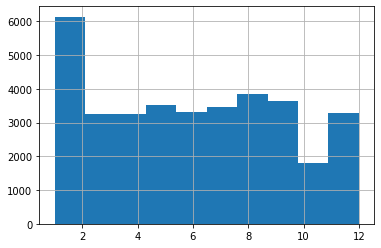

In [38]:
accidentes_num['MES'].hist()

In [39]:
accidentes_num['MES'].unique()

array([ 9,  3,  8, 10, 12,  1, 11,  4,  5,  6,  7,  2], dtype=int64)

In [40]:



for i in range(12):
       
    meses = (accidentes_num['MES'] == i+1 ).value_counts()
    print(f'mes {i}\n {meses}\n ')
           


mes 0
 False    32520
True      2952
Name: MES, dtype: int64
 
mes 1
 False    32287
True      3185
Name: MES, dtype: int64
 
mes 2
 False    32225
True      3247
Name: MES, dtype: int64
 
mes 3
 False    32226
True      3246
Name: MES, dtype: int64
 
mes 4
 False    31958
True      3514
Name: MES, dtype: int64
 
mes 5
 False    32169
True      3303
Name: MES, dtype: int64
 
mes 6
 False    31998
True      3474
Name: MES, dtype: int64
 
mes 7
 False    31611
True      3861
Name: MES, dtype: int64
 
mes 8
 False    31846
True      3626
Name: MES, dtype: int64
 
mes 9
 False    33677
True      1795
Name: MES, dtype: int64
 
mes 10
 False    33853
True      1619
Name: MES, dtype: int64
 
mes 11
 False    33822
True      1650
Name: MES, dtype: int64
 


In [41]:
accidentes.shape

(35472, 25)

# Buscando datos faltantes (nulos o NaN)

In [42]:
accidentes_num.notnull().apply(pd.Series.value_counts)

,DIA,DIA_SEMANA,MES,OBJECTID,PERIODO,RADICADO,X,Y,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
True,35472,35472,35472,35472,35472,35472,35472,35472,35472,35472,35472,35472,35472


In [43]:
(accidentes_num != 0).apply(pd.Series.value_counts)

,DIA,DIA_SEMANA,MES,OBJECTID,PERIODO,RADICADO,X,Y,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
False,NaN,5245,NaN,NaN,NaN,NaN,NaN,NaN,2612,18741,21707,24658,880
True,35472.0,30227,35472.0,35472.0,35472.0,35472.0,35472.0,35472.0,32860,16731,13765,10814,34592


In [44]:
from sklearn.impute import SimpleImputer as Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean')

In [45]:
values = imputer.fit_transform(accidentes_num)

In [46]:
#Array numpy

accidentes_num.values


array([[ 20.,   0.,   9., ...,   0.,   0.,   0.],
       [ 21.,   1.,   3., ...,   0.,   1.,   1.],
       [ 30.,   0.,   8., ...,   1.,   0.,   2.],
       ...,
       [  5.,   0.,   9., ...,   0.,   0., 152.],
       [ 23.,   6.,   4., ...,   0.,   3.,  53.],
       [ 23.,   6.,   4., ...,   1.,   0.,  66.]])

In [47]:
x = pd.DataFrame(values)

In [48]:
x.columns = accidentes_num.columns

In [49]:
x.index = accidentes_num.index

In [50]:
x.head()

,DIA,DIA_SEMANA,MES,OBJECTID,PERIODO,RADICADO,X,Y,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE,NUM_BARRIO
0,20.0,0.0,9.0,673380.0,2018.0,1642888.0,-75.578357,6.213719,0.0,0.0,0.0,0.0,0.0
1,21.0,1.0,3.0,557526.0,2018.0,1620950.0,-75.592022,6.279157,1.0,0.0,0.0,1.0,1.0
2,30.0,0.0,8.0,674912.0,2018.0,1640270.0,-75.595882,6.275555,1.0,1.0,1.0,0.0,2.0
3,10.0,2.0,9.0,674286.0,2018.0,1641770.0,-75.567284,6.248271,2.0,1.0,1.0,0.0,3.0
4,12.0,3.0,10.0,681701.0,2018.0,1645768.0,-75.576195,6.213677,3.0,1.0,0.0,0.0,4.0


In [52]:
accidentes['NUM_GRAVEDAD'].unique()

array([0, 1, 2], dtype=int64)

In [53]:
x.to_csv("subMuestra-X.csv",index = False)